In [1]:
import math, itertools, copy
import numpy as np
import matplotlib.pyplot as plt

from pgmpy.factors.discrete import TabularCPD, DiscreteFactor
from pgmpy.models import ClusterGraph, MarkovModel, BayesianModel
from pgmpy.inference.ExactInference import BeliefPropagation

from pgm_utils import *
from pgm_algorithms import MeanFieldInference, LoopyBeliefPropagation

%matplotlib inline

In [30]:
def experiment_3():
    # Set up factors
    np.random.seed(seed=1)
    inner = (75,150)
    outer = (1,30)
    inner_edge = (100,200)
    outer_edge = (15,30)
    inner_size=2
    outer_size=2
    
    A = DiscreteFactor(variables=["A"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=(outer_size)))
    B = DiscreteFactor(variables=["B"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    C = DiscreteFactor(variables=["C"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    D = DiscreteFactor(variables=["D"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    E = DiscreteFactor(variables=["E"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    H = DiscreteFactor(variables=["H"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    I = DiscreteFactor(variables=["I"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    L = DiscreteFactor(variables=["L"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    M = DiscreteFactor(variables=["M"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    N = DiscreteFactor(variables=["N"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    O = DiscreteFactor(variables=["O"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    P = DiscreteFactor(variables=["P"], cardinality=[outer_size],
                       values=np.random.uniform(outer[0], outer[1],
                                                size=[outer_size]))
    
    F = DiscreteFactor(variables=["F"], cardinality=[inner_size],
                       values=np.random.uniform(inner[0], inner[1],
                                                size=(inner_size)))
    G = DiscreteFactor(variables=["G"], cardinality=[inner_size],
                       values=np.random.uniform(inner[0], inner[1],
                                                size=(inner_size)))
    J = DiscreteFactor(variables=["J"], cardinality=[inner_size],
                       values=np.random.uniform(inner[0], inner[1],
                                                size=(inner_size)))
    K = DiscreteFactor(variables=["K"], cardinality=[inner_size],
                       values=np.random.uniform(inner[0], inner[1],
                                                size=(inner_size)))
    
    my_factors = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P]
    
    network = MarkovModel([('A','B'), ('B','C'), ('C','D'),
                           ('A','E'), ('B','F'), ('C','G'), ('D','H'),
                           ('E','F'), ('F','G'), ('G','H'),
                           ('E','I'), ('F','J'), ('G','K'), ('H','L'),
                           ('I','J'), ('J','K'), ('K','L'),
                           ('I','M'), ('J','N'), ('K','O'), ('L','P'),
                           ('M','N'), ('N','O'), ('O', 'P')])
    network.add_factors(*my_factors)
    # I will not make the mistake of not automating it again
    edge_factors = []
    for edge in network.edges():
        fvars = [edge[0], edge[1]]
        fcard_0 = network.get_cardinality(edge[0])
        fcard_1 = network.get_cardinality(edge[1])
        if edge[0] in ['F', 'G','J','K'] and edge[1] in ['F', 'G','J','K']:
            f = DiscreteFactor(variables=fvars, cardinality=[fcard_0, fcard_1],
                               values=np.random.uniform(inner_edge[0], inner_edge[1],
                                                        size=(fcard_0, fcard_1)))
        else:
            f = DiscreteFactor(variables=fvars, cardinality=[fcard_0, fcard_1],
                               values=np.random.uniform(outer_edge[0], outer_edge[1],
                                                        size=(fcard_0, fcard_1)))
        edge_factors.append(f)
        
    network.add_factors(*edge_factors)
        
    print("Is model valid?", network.check_model())
    
    my_factors = my_factors + edge_factors
    
    for f in my_factors:
        f.normalize()
        
    for f in my_factors:
        print(f)
    
    return my_factors, network

In [31]:
my_factors, network = experiment_3()

Is model valid? True
╒═════╤══════════╕
│ A   │   phi(A) │
╞═════╪══════════╡
│ A_0 │   0.3743 │
├─────┼──────────┤
│ A_1 │   0.6257 │
╘═════╧══════════╛
╒═════╤══════════╕
│ B   │   phi(B) │
╞═════╪══════════╡
│ B_0 │   0.0932 │
├─────┼──────────┤
│ B_1 │   0.9068 │
╘═════╧══════════╛
╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.5883 │
├─────┼──────────┤
│ C_1 │   0.4117 │
╘═════╧══════════╛
╒═════╤══════════╕
│ D   │   phi(D) │
╞═════╪══════════╡
│ D_0 │   0.3674 │
├─────┼──────────┤
│ D_1 │   0.6326 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.4293 │
├─────┼──────────┤
│ E_1 │   0.5707 │
╘═════╧══════════╛
╒═════╤══════════╕
│ F   │   phi(F) │
╞═════╪══════════╡
│ F_0 │   0.4976 │
├─────┼──────────┤
│ F_1 │   0.5024 │
╘═════╧══════════╛
╒═════╤══════════╕
│ G   │   phi(G) │
╞═════╪══════════╡
│ G_0 │   0.5108 │
├─────┼──────────┤
│ G_1 │   0.4892 │
╘═════╧══════════╛
╒═════╤══════════╕
│ H   │   phi(H) │
╞═════╪═══

In [32]:
mfa = MeanFieldInference(my_factors)
mfa_h = mfa.mean_field_approximation()
for _,q in mfa.Q.items():
    print(q.normalize(inplace=False))

╒═════╤══════════╕
│ J   │   phi(J) │
╞═════╪══════════╡
│ J_0 │   0.4584 │
├─────┼──────────┤
│ J_1 │   0.5416 │
╘═════╧══════════╛
╒═════╤══════════╕
│ N   │   phi(N) │
╞═════╪══════════╡
│ N_0 │   0.4483 │
├─────┼──────────┤
│ N_1 │   0.5517 │
╘═════╧══════════╛
╒═════╤══════════╕
│ B   │   phi(B) │
╞═════╪══════════╡
│ B_0 │   0.2772 │
├─────┼──────────┤
│ B_1 │   0.7228 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.4869 │
├─────┼──────────┤
│ E_1 │   0.5131 │
╘═════╧══════════╛
╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.5490 │
├─────┼──────────┤
│ C_1 │   0.4510 │
╘═════╧══════════╛
╒═════╤══════════╕
│ G   │   phi(G) │
╞═════╪══════════╡
│ G_0 │   0.5488 │
├─────┼──────────┤
│ G_1 │   0.4512 │
╘═════╧══════════╛
╒═════╤══════════╕
│ F   │   phi(F) │
╞═════╪══════════╡
│ F_0 │   0.5122 │
├─────┼──────────┤
│ F_1 │   0.4878 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.

Number of iterations: 224


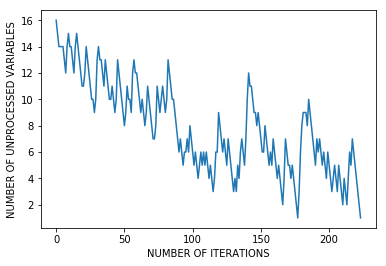

In [5]:
print("Number of iterations:", mfa_h["iterations"])
plt.plot(mfa_h["processed"])
plt.xlabel("NUMBER OF ITERATIONS")
plt.ylabel("NUMBER OF UNPROCESSED VARIABLES")
plt.show()

In [15]:
# Test LBP
lbp = LoopyBeliefPropagation(my_factors)
lbp_h = lbp.loopy_belief_propagation(lambd=0.001, num_iterations=50000)

G ('G', 'K') has converged at iteration 161
J ('J', 'F') has converged at iteration 2368
('K', 'O') K has converged at iteration 2440
('K', 'O') K has converged at iteration 2441
('C', 'D') D has converged at iteration 4551
('C', 'D') D has converged at iteration 4552
('C', 'D') D has converged at iteration 4553
('C', 'D') D has converged at iteration 4554
('C', 'D') D has converged at iteration 4558
('C', 'D') D has converged at iteration 4559
('C', 'D') D has converged at iteration 4560
F ('J', 'F') has converged at iteration 6414
F ('J', 'F') has converged at iteration 6415
F ('J', 'F') has converged at iteration 6416
F ('J', 'F') has converged at iteration 6417
P ('P', 'O') has converged at iteration 9563
P ('P', 'O') has converged at iteration 9564
P ('P', 'O') has converged at iteration 9565
E ('E', 'A') has converged at iteration 12087
E ('E', 'A') has converged at iteration 12088
E ('E', 'A') has converged at iteration 12089
E ('E', 'A') has converged at iteration 12090
E ('E',

In [16]:
for _,cb in lbp.cluster_beliefs.items():
    print(cb.normalize(inplace=False))

╒═════╤═════╤════════════╕
│ J   │ N   │   phi(J,N) │
╞═════╪═════╪════════════╡
│ J_0 │ N_0 │     0.2319 │
├─────┼─────┼────────────┤
│ J_0 │ N_1 │     0.2662 │
├─────┼─────┼────────────┤
│ J_1 │ N_0 │     0.1777 │
├─────┼─────┼────────────┤
│ J_1 │ N_1 │     0.3242 │
╘═════╧═════╧════════════╛
╒═════╤══════════╕
│ J   │   phi(J) │
╞═════╪══════════╡
│ J_0 │   0.4406 │
├─────┼──────────┤
│ J_1 │   0.5594 │
╘═════╧══════════╛
╒═════╤═════╤════════════╕
│ N   │ O   │   phi(N,O) │
╞═════╪═════╪════════════╡
│ N_0 │ O_0 │     0.1912 │
├─────┼─────┼────────────┤
│ N_0 │ O_1 │     0.2137 │
├─────┼─────┼────────────┤
│ N_1 │ O_0 │     0.1921 │
├─────┼─────┼────────────┤
│ N_1 │ O_1 │     0.4031 │
╘═════╧═════╧════════════╛
╒═════╤═════╤════════════╕
│ B   │ A   │   phi(B,A) │
╞═════╪═════╪════════════╡
│ B_0 │ A_0 │     0.0746 │
├─────┼─────┼────────────┤
│ B_0 │ A_1 │     0.1146 │
├─────┼─────┼────────────┤
│ B_1 │ A_0 │     0.4056 │
├─────┼─────┼────────────┤
│ B_1 │ A_1 │     0.4052 │
╘══

In [17]:
for _,sb in lbp.sepset_beliefs.items():
    print(sb.normalize(inplace=False))

╒═════╤══════════╕
│ D   │   phi(D) │
╞═════╪══════════╡
│ D_0 │   0.3190 │
├─────┼──────────┤
│ D_1 │   0.6810 │
╘═════╧══════════╛
╒═════╤══════════╕
│ K   │   phi(K) │
╞═════╪══════════╡
│ K_0 │   0.5700 │
├─────┼──────────┤
│ K_1 │   0.4300 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.5309 │
├─────┼──────────┤
│ E_1 │   0.4691 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.2175 │
├─────┼──────────┤
│ I_1 │   0.7825 │
╘═════╧══════════╛
╒═════╤══════════╕
│ G   │   phi(G) │
╞═════╪══════════╡
│ G_0 │   0.5434 │
├─────┼──────────┤
│ G_1 │   0.4566 │
╘═════╧══════════╛
╒═════╤══════════╕
│ M   │   phi(M) │
╞═════╪══════════╡
│ M_0 │   0.5225 │
├─────┼──────────┤
│ M_1 │   0.4775 │
╘═════╧══════════╛
╒═════╤══════════╕
│ O   │   phi(O) │
╞═════╪══════════╡
│ O_0 │   0.3993 │
├─────┼──────────┤
│ O_1 │   0.6007 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.

Number of iterations: 50000


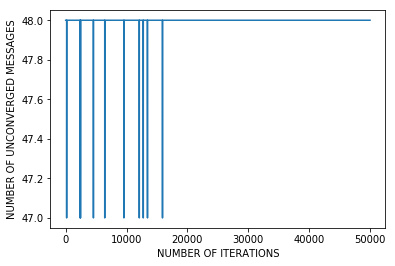

In [18]:
print("Number of iterations:", lbp_h["iterations"])
plt.plot(lbp_h["convergence"])
plt.xlabel("NUMBER OF ITERATIONS")
plt.ylabel("NUMBER OF UNCONVERGED MESSAGES")
plt.show()

In [21]:
# Test LBP
lbp_short = LoopyBeliefPropagation(my_factors)
lbp_short_h = lbp_short.loopy_belief_propagation(lambd=0.1, num_iterations=7500)

('J', 'N') J has converged at iteration 7033
('J', 'N') J has converged at iteration 7034
('J', 'N') J has converged at iteration 7035
('J', 'N') J has converged at iteration 7036
('J', 'N') J has converged at iteration 7037
('J', 'N') J has converged at iteration 7038
J ('J', 'K') has converged at iteration 7038
F ('G', 'F') has converged at iteration 7038
J ('J', 'K') has converged at iteration 7039
F ('G', 'F') has converged at iteration 7039
J ('J', 'K') has converged at iteration 7040
F ('G', 'F') has converged at iteration 7040
('J', 'N') J has converged at iteration 7041
J ('J', 'K') has converged at iteration 7041
F ('G', 'F') has converged at iteration 7041
F ('B', 'F') has converged at iteration 7041
('J', 'N') J has converged at iteration 7042
J ('J', 'K') has converged at iteration 7042
F ('B', 'F') has converged at iteration 7042
('J', 'N') J has converged at iteration 7043
J ('J', 'K') has converged at iteration 7043
F ('B', 'F') has converged at iteration 7043
('J', 'N')

C ('C', 'G') has converged at iteration 7067
('E', 'F') E has converged at iteration 7067
I ('J', 'I') has converged at iteration 7067
('C', 'G') G has converged at iteration 7067
('B', 'C') B has converged at iteration 7067
L ('L', 'H') has converged at iteration 7067
L ('K', 'L') has converged at iteration 7067
('B', 'F') B has converged at iteration 7067
('G', 'H') G has converged at iteration 7067
('G', 'H') H has converged at iteration 7067
('K', 'O') K has converged at iteration 7067
('K', 'O') O has converged at iteration 7067
H ('L', 'H') has converged at iteration 7067
('K', 'L') K has converged at iteration 7067
('J', 'K') K has converged at iteration 7067
G ('G', 'F') has converged at iteration 7067
G ('G', 'K') has converged at iteration 7067
('G', 'K') K has converged at iteration 7067
('J', 'N') J has converged at iteration 7068
('J', 'N') N has converged at iteration 7068
J ('J', 'K') has converged at iteration 7068
J ('J', 'I') has converged at iteration 7068
J ('J', 'F

H ('L', 'H') has converged at iteration 7078
('K', 'L') K has converged at iteration 7078
('J', 'K') K has converged at iteration 7078
G ('G', 'F') has converged at iteration 7078
G ('G', 'K') has converged at iteration 7078
('G', 'K') K has converged at iteration 7078
('J', 'N') J has converged at iteration 7079
('J', 'N') N has converged at iteration 7079
J ('J', 'K') has converged at iteration 7079
J ('J', 'I') has converged at iteration 7079
J ('J', 'F') has converged at iteration 7079
('N', 'O') N has converged at iteration 7079
('N', 'O') O has converged at iteration 7079
('E', 'I') E has converged at iteration 7079
('E', 'I') I has converged at iteration 7079
F ('G', 'F') has converged at iteration 7079
F ('B', 'F') has converged at iteration 7079
F ('E', 'F') has converged at iteration 7079
F ('J', 'F') has converged at iteration 7079
C ('B', 'C') has converged at iteration 7079
C ('C', 'G') has converged at iteration 7079
('E', 'F') E has converged at iteration 7079
I ('J', 'I

('N', 'O') O has converged at iteration 7089
('E', 'I') E has converged at iteration 7089
('E', 'I') I has converged at iteration 7089
F ('G', 'F') has converged at iteration 7089
F ('B', 'F') has converged at iteration 7089
F ('E', 'F') has converged at iteration 7089
F ('J', 'F') has converged at iteration 7089
C ('B', 'C') has converged at iteration 7089
C ('C', 'G') has converged at iteration 7089
('E', 'F') E has converged at iteration 7089
I ('J', 'I') has converged at iteration 7089
('C', 'G') G has converged at iteration 7089
('B', 'C') B has converged at iteration 7089
('N', 'M') M has converged at iteration 7089
L ('L', 'H') has converged at iteration 7089
L ('K', 'L') has converged at iteration 7089
('B', 'F') B has converged at iteration 7089
('G', 'H') G has converged at iteration 7089
('G', 'H') H has converged at iteration 7089
('K', 'O') K has converged at iteration 7089
('K', 'O') O has converged at iteration 7089
H ('L', 'H') has converged at iteration 7089
('K', 'L')

('J', 'N') J has converged at iteration 7100
('J', 'N') N has converged at iteration 7100
J ('J', 'K') has converged at iteration 7100
J ('J', 'I') has converged at iteration 7100
J ('J', 'F') has converged at iteration 7100
('N', 'O') N has converged at iteration 7100
('N', 'O') O has converged at iteration 7100
('E', 'I') E has converged at iteration 7100
('E', 'I') I has converged at iteration 7100
F ('G', 'F') has converged at iteration 7100
F ('B', 'F') has converged at iteration 7100
F ('E', 'F') has converged at iteration 7100
F ('J', 'F') has converged at iteration 7100
C ('B', 'C') has converged at iteration 7100
C ('C', 'G') has converged at iteration 7100
('E', 'F') E has converged at iteration 7100
I ('J', 'I') has converged at iteration 7100
('C', 'G') G has converged at iteration 7100
('B', 'C') B has converged at iteration 7100
L ('L', 'H') has converged at iteration 7100
L ('K', 'L') has converged at iteration 7100
('B', 'F') B has converged at iteration 7100
('G', 'H')

('E', 'I') I has converged at iteration 7111
F ('G', 'F') has converged at iteration 7111
F ('B', 'F') has converged at iteration 7111
F ('E', 'F') has converged at iteration 7111
F ('J', 'F') has converged at iteration 7111
C ('B', 'C') has converged at iteration 7111
C ('C', 'G') has converged at iteration 7111
('E', 'F') E has converged at iteration 7111
I ('J', 'I') has converged at iteration 7111
('C', 'G') G has converged at iteration 7111
('B', 'C') B has converged at iteration 7111
L ('L', 'H') has converged at iteration 7111
L ('K', 'L') has converged at iteration 7111
('B', 'F') B has converged at iteration 7111
('G', 'H') G has converged at iteration 7111
('G', 'H') H has converged at iteration 7111
('K', 'O') K has converged at iteration 7111
('K', 'O') O has converged at iteration 7111
H ('L', 'H') has converged at iteration 7111
('K', 'L') K has converged at iteration 7111
('J', 'K') K has converged at iteration 7111
G ('G', 'F') has converged at iteration 7111
G ('G', 'K

I ('J', 'I') has converged at iteration 7122
('C', 'G') G has converged at iteration 7122
('B', 'C') B has converged at iteration 7122
L ('L', 'H') has converged at iteration 7122
L ('K', 'L') has converged at iteration 7122
('P', 'L') P has converged at iteration 7122
('B', 'F') B has converged at iteration 7122
('G', 'H') G has converged at iteration 7122
('G', 'H') H has converged at iteration 7122
('K', 'O') K has converged at iteration 7122
('K', 'O') O has converged at iteration 7122
H ('L', 'H') has converged at iteration 7122
('K', 'L') K has converged at iteration 7122
('J', 'K') K has converged at iteration 7122
G ('G', 'F') has converged at iteration 7122
G ('G', 'K') has converged at iteration 7122
('G', 'K') K has converged at iteration 7122
('J', 'N') J has converged at iteration 7123
('J', 'N') N has converged at iteration 7123
J ('J', 'K') has converged at iteration 7123
J ('J', 'I') has converged at iteration 7123
J ('J', 'F') has converged at iteration 7123
('N', 'O')

J ('J', 'I') has converged at iteration 7134
J ('J', 'F') has converged at iteration 7134
('N', 'O') N has converged at iteration 7134
('N', 'O') O has converged at iteration 7134
('E', 'I') E has converged at iteration 7134
('E', 'I') I has converged at iteration 7134
F ('G', 'F') has converged at iteration 7134
F ('B', 'F') has converged at iteration 7134
F ('E', 'F') has converged at iteration 7134
F ('J', 'F') has converged at iteration 7134
C ('B', 'C') has converged at iteration 7134
C ('C', 'G') has converged at iteration 7134
('E', 'F') E has converged at iteration 7134
I ('J', 'I') has converged at iteration 7134
('C', 'G') G has converged at iteration 7134
('B', 'C') B has converged at iteration 7134
L ('L', 'H') has converged at iteration 7134
L ('K', 'L') has converged at iteration 7134
('P', 'L') P has converged at iteration 7134
('B', 'F') B has converged at iteration 7134
('G', 'H') G has converged at iteration 7134
('G', 'H') H has converged at iteration 7134
('K', 'O')

F ('B', 'F') has converged at iteration 7145
F ('E', 'F') has converged at iteration 7145
F ('J', 'F') has converged at iteration 7145
C ('B', 'C') has converged at iteration 7145
C ('C', 'G') has converged at iteration 7145
('E', 'F') E has converged at iteration 7145
I ('J', 'I') has converged at iteration 7145
('C', 'G') G has converged at iteration 7145
('B', 'C') B has converged at iteration 7145
L ('L', 'H') has converged at iteration 7145
L ('K', 'L') has converged at iteration 7145
('P', 'L') P has converged at iteration 7145
('B', 'F') B has converged at iteration 7145
('G', 'H') G has converged at iteration 7145
('G', 'H') H has converged at iteration 7145
('K', 'O') K has converged at iteration 7145
('K', 'O') O has converged at iteration 7145
H ('L', 'H') has converged at iteration 7145
('K', 'L') K has converged at iteration 7145
('J', 'K') K has converged at iteration 7145
G ('G', 'F') has converged at iteration 7145
G ('G', 'K') has converged at iteration 7145
('G', 'K')

F ('G', 'F') has converged at iteration 7156
F ('B', 'F') has converged at iteration 7156
F ('E', 'F') has converged at iteration 7156
F ('J', 'F') has converged at iteration 7156
C ('B', 'C') has converged at iteration 7156
C ('C', 'D') has converged at iteration 7156
C ('C', 'G') has converged at iteration 7156
('E', 'F') E has converged at iteration 7156
I ('J', 'I') has converged at iteration 7156
I ('I', 'M') has converged at iteration 7156
('C', 'G') G has converged at iteration 7156
('B', 'C') B has converged at iteration 7156
('N', 'M') N has converged at iteration 7156
L ('L', 'H') has converged at iteration 7156
L ('K', 'L') has converged at iteration 7156
('B', 'F') B has converged at iteration 7156
('G', 'H') G has converged at iteration 7156
('G', 'H') H has converged at iteration 7156
('K', 'O') K has converged at iteration 7156
('K', 'O') O has converged at iteration 7156
H ('L', 'H') has converged at iteration 7156
('K', 'L') K has converged at iteration 7156
E ('E', 'A

('C', 'D') D has converged at iteration 7167
('E', 'A') A has converged at iteration 7167
G ('G', 'F') has converged at iteration 7167
G ('G', 'K') has converged at iteration 7167
D ('D', 'H') has converged at iteration 7167
('G', 'K') K has converged at iteration 7167
P ('P', 'O') has converged at iteration 7167
O ('P', 'O') has converged at iteration 7167
Loopy BP has converged.


In [22]:
for _,cb in lbp_short.cluster_beliefs.items():
    print(cb.normalize(inplace=False))

╒═════╤═════╤════════════╕
│ J   │ N   │   phi(J,N) │
╞═════╪═════╪════════════╡
│ J_0 │ N_0 │     0.2500 │
├─────┼─────┼────────────┤
│ J_0 │ N_1 │     0.2500 │
├─────┼─────┼────────────┤
│ J_1 │ N_0 │     0.2500 │
├─────┼─────┼────────────┤
│ J_1 │ N_1 │     0.2500 │
╘═════╧═════╧════════════╛
╒═════╤══════════╕
│ J   │   phi(J) │
╞═════╪══════════╡
│ J_0 │   0.5000 │
├─────┼──────────┤
│ J_1 │   0.5000 │
╘═════╧══════════╛
╒═════╤═════╤════════════╕
│ N   │ O   │   phi(N,O) │
╞═════╪═════╪════════════╡
│ N_0 │ O_0 │     0.2500 │
├─────┼─────┼────────────┤
│ N_0 │ O_1 │     0.2500 │
├─────┼─────┼────────────┤
│ N_1 │ O_0 │     0.2500 │
├─────┼─────┼────────────┤
│ N_1 │ O_1 │     0.2500 │
╘═════╧═════╧════════════╛
╒═════╤═════╤════════════╕
│ B   │ A   │   phi(B,A) │
╞═════╪═════╪════════════╡
│ B_0 │ A_0 │     0.2500 │
├─────┼─────┼────────────┤
│ B_0 │ A_1 │     0.2500 │
├─────┼─────┼────────────┤
│ B_1 │ A_0 │     0.2500 │
├─────┼─────┼────────────┤
│ B_1 │ A_1 │     0.2500 │
╘══

In [23]:
for _,sb in lbp_short.sepset_beliefs.items():
    print(sb.normalize(inplace=False))

╒═════╤══════════╕
│ D   │   phi(D) │
╞═════╪══════════╡
│ D_0 │   0.3155 │
├─────┼──────────┤
│ D_1 │   0.6845 │
╘═════╧══════════╛
╒═════╤══════════╕
│ K   │   phi(K) │
╞═════╪══════════╡
│ K_0 │   0.5761 │
├─────┼──────────┤
│ K_1 │   0.4239 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.5340 │
├─────┼──────────┤
│ E_1 │   0.4660 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.2142 │
├─────┼──────────┤
│ I_1 │   0.7858 │
╘═════╧══════════╛
╒═════╤══════════╕
│ G   │   phi(G) │
╞═════╪══════════╡
│ G_0 │   0.5439 │
├─────┼──────────┤
│ G_1 │   0.4561 │
╘═════╧══════════╛
╒═════╤══════════╕
│ M   │   phi(M) │
╞═════╪══════════╡
│ M_0 │   0.5271 │
├─────┼──────────┤
│ M_1 │   0.4729 │
╘═════╧══════════╛
╒═════╤══════════╕
│ O   │   phi(O) │
╞═════╪══════════╡
│ O_0 │   0.4021 │
├─────┼──────────┤
│ O_1 │   0.5979 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.

In [19]:
bp = BeliefPropagation(network)
bp.calibrate()
vars_to_query = set()
for f in my_factors:
    vars_query = f.scope()
    vars_to_query = vars_to_query.union(vars_query)
for v in vars_to_query:
    f = bp.query([v])
    print(f[v])

╒═════╤══════════╕
│ J   │   phi(J) │
╞═════╪══════════╡
│ J_0 │   0.4178 │
├─────┼──────────┤
│ J_1 │   0.5822 │
╘═════╧══════════╛
╒═════╤══════════╕
│ F   │   phi(F) │
╞═════╪══════════╡
│ F_0 │   0.5875 │
├─────┼──────────┤
│ F_1 │   0.4125 │
╘═════╧══════════╛
╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.5881 │
├─────┼──────────┤
│ C_1 │   0.4119 │
╘═════╧══════════╛
╒═════╤══════════╕
│ P   │   phi(P) │
╞═════╪══════════╡
│ P_0 │   0.5047 │
├─────┼──────────┤
│ P_1 │   0.4953 │
╘═════╧══════════╛
╒═════╤══════════╕
│ I   │   phi(I) │
╞═════╪══════════╡
│ I_0 │   0.1272 │
├─────┼──────────┤
│ I_1 │   0.8728 │
╘═════╧══════════╛
╒═════╤══════════╕
│ L   │   phi(L) │
╞═════╪══════════╡
│ L_0 │   0.0853 │
├─────┼──────────┤
│ L_1 │   0.9147 │
╘═════╧══════════╛
╒═════╤══════════╕
│ H   │   phi(H) │
╞═════╪══════════╡
│ H_0 │   0.2716 │
├─────┼──────────┤
│ H_1 │   0.7284 │
╘═════╧══════════╛
╒═════╤══════════╕
│ E   │   phi(E) │
╞═════╪══════════╡
│ E_0 │   0.

In [24]:
for _, val in bp.get_clique_beliefs().items():
    print(val.normalize(inplace=False))

╒═════╤═════╤═════╤═════╤════════════════╕
│ I   │ E   │ A   │ F   │   phi(I,E,A,F) │
╞═════╪═════╪═════╪═════╪════════════════╡
│ I_0 │ E_0 │ A_0 │ F_0 │         0.0174 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_0 │ E_0 │ A_0 │ F_1 │         0.0125 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_0 │ E_0 │ A_1 │ F_0 │         0.0238 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_0 │ E_0 │ A_1 │ F_1 │         0.0170 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_0 │ E_1 │ A_0 │ F_0 │         0.0253 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_0 │ E_1 │ A_0 │ F_1 │         0.0255 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_0 │ E_1 │ A_1 │ F_0 │         0.0252 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_0 │ E_1 │ A_1 │ F_1 │         0.0255 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_1 │ E_0 │ A_0 │ F_0 │         0.1162 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_1 │ E_0 │ A_0 │ F_1 │         0.0834 │
├─────┼─────┼─────┼─────┼────────────────┤
│ I_1 │ E_0

In [25]:
for _, val in bp.get_sepset_beliefs().items():
    print(val.normalize(inplace=False))

╒═════╤═════╤═════╤═════╤═════╤══════════════════╕
│ I   │ M   │ O   │ F   │ K   │   phi(I,M,O,F,K) │
╞═════╪═════╪═════╪═════╪═════╪══════════════════╡
│ I_0 │ M_0 │ O_0 │ F_0 │ K_0 │           0.0075 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_0 │ O_0 │ F_0 │ K_1 │           0.0067 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_0 │ O_0 │ F_1 │ K_0 │           0.0063 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_0 │ O_0 │ F_1 │ K_1 │           0.0061 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_0 │ O_1 │ F_0 │ K_0 │           0.0107 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_0 │ O_1 │ F_0 │ K_1 │           0.0116 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_0 │ O_1 │ F_1 │ K_0 │           0.0091 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_0 │ O_1 │ F_1 │ K_1 │           0.0106 │
├─────┼─────┼─────┼─────┼─────┼──────────────────┤
│ I_0 │ M_1 │ O_0 │ F_0 │ K_0 │